In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hakusan_elec.csv", sep=",", header=1)
print(df.shape)
print(df.info())
display(df.head())

(2655, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          2655 non-null   object
 1   bldg_1        2655 non-null   int64 
 2   bldg_2&3      2655 non-null   int64 
 3   bldg_4        2655 non-null   int64 
 4   bldg_5        2655 non-null   int64 
 5   bldg_6        2655 non-null   int64 
 6   bldg_7        2655 non-null   int64 
 7   bldg_8&9      2655 non-null   int64 
 8   bldg_10       2655 non-null   int64 
 9   Hosui-kaikan  2655 non-null   int64 
 10  Total         2655 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 228.3+ KB
None


Date  bldg_1  bldg_2&3  bldg_4  bldg_5  bldg_6  bldg_7  bldg_8&9  \
0  2014/4/1    5940      8480    1800    1800    6000      62      3660   
1  2014/4/2    5460      8550    1600    2100    5700      65      3700   
2  2014/4/3    5390      8220    2000    2000    6800      70      3720   
3  2014/4/4    4220      8280    1800    2000    7200      70      3720   
4  2014/4/5    5650      7840    1500    1900    5000      65      3220   

   bldg_10  Hosui-kaikan  Total  
0        0           384  28116  
1        0           337  27512  
2        0           418  28667  
3        0           399  27719  
4        0           239  25384

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2655 non-null   datetime64[ns]
 1   bldg_1        2655 non-null   int64         
 2   bldg_2&3      2655 non-null   int64         
 3   bldg_4        2655 non-null   int64         
 4   bldg_5        2655 non-null   int64         
 5   bldg_6        2655 non-null   int64         
 6   bldg_7        2655 non-null   int64         
 7   bldg_8&9      2655 non-null   int64         
 8   bldg_10       2655 non-null   int64         
 9   Hosui-kaikan  2655 non-null   int64         
 10  Total         2655 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 228.3 KB
None


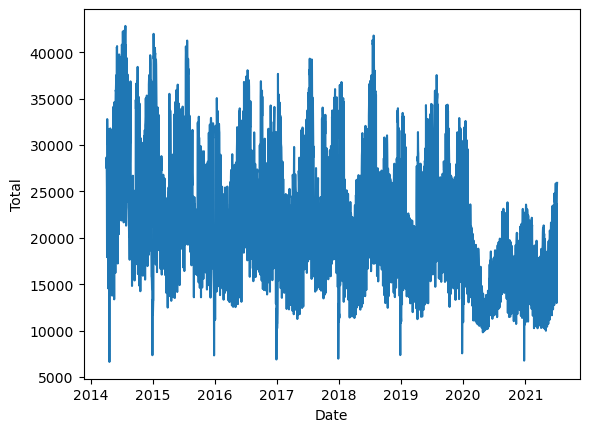

In [4]:
plt.plot(df["Date"], df["Total"])
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

In [5]:
df=df.set_index("Date")
display(df.head())

bldg_1  bldg_2&3  bldg_4  bldg_5  bldg_6  bldg_7  bldg_8&9  \
Date                                                                     
2014-04-01    5940      8480    1800    1800    6000      62      3660   
2014-04-02    5460      8550    1600    2100    5700      65      3700   
2014-04-03    5390      8220    2000    2000    6800      70      3720   
2014-04-04    4220      8280    1800    2000    7200      70      3720   
2014-04-05    5650      7840    1500    1900    5000      65      3220   

            bldg_10  Hosui-kaikan  Total  
Date                                      
2014-04-01        0           384  28116  
2014-04-02        0           337  27512  
2014-04-03        0           418  28667  
2014-04-04        0           399  27719  
2014-04-05        0           239  25384

In [6]:
df_rolling30d = df.rolling("30D").mean()


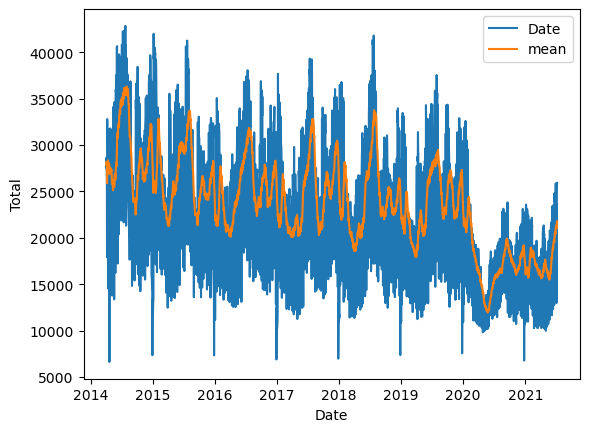

In [7]:
plt.plot(df.index, df["Total"], label="Date")
plt.plot(df_rolling30d.index,df_rolling30d["Total"], label="mean")
plt.xlabel("Date")
plt.ylabel("Total")
plt.legend()
plt.show()

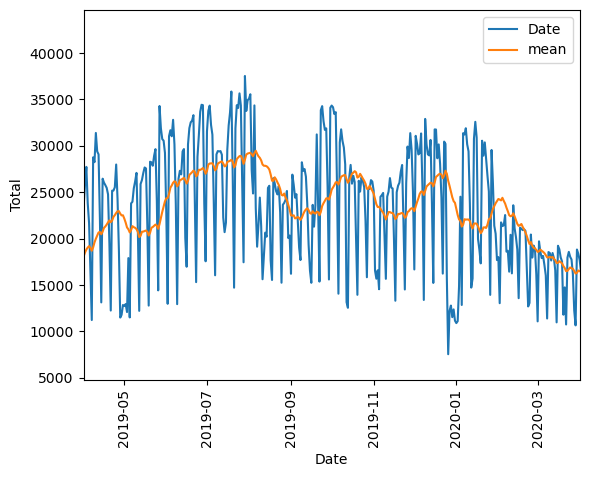

In [8]:
start = pd.to_datetime("2019-04-01")
end=pd.to_datetime("2020-04-01")

plt.plot(df.index, df["Total"], label="Date")
plt.plot(df_rolling30d.index,df_rolling30d["Total"], label="mean")

plt.xlim(start, end)

plt.xlabel("Date")
plt.ylabel("Total")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [9]:
df_resample_w = df.resample("W").mean()
display(df_resample_w.head())
print(df_resample_w.info())

bldg_1     bldg_2&3       bldg_4       bldg_5       bldg_6  \
Date                                                                          
2014-04-06  4838.333333  7988.333333  1633.333333  1950.000000  5750.000000   
2014-04-13  5167.142857  8765.714286  1785.714286  1871.428571  6542.857143   
2014-04-20  4401.428571  8415.714286  1771.428571  1657.142857  6371.428571   
2014-04-27  4418.571429  8728.571429  1900.000000  1742.857143  6571.428571   
2014-05-04  4214.285714  8245.714286  1800.000000  1385.714286  6342.857143   

                bldg_7     bldg_8&9  bldg_10  Hosui-kaikan         Total  
Date                                                                      
2014-04-06   65.666667  3323.333333      0.0    322.500000  25884.666667  
2014-04-13  107.571429  3494.285714      0.0    342.714286  28101.857143  
2014-04-20  106.571429  3391.428571      0.0    315.857143  26458.428571  
2014-04-27  107.142857  3447.142857      0.0    351.714286  27289.000000  
2014-05-04  101.857143  2877.142857      0.0    236.571429  25218.285714

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2014-04-06 to 2021-07-11
Freq: W-SUN
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bldg_1        380 non-null    float64
 1   bldg_2&3      380 non-null    float64
 2   bldg_4        380 non-null    float64
 3   bldg_5        380 non-null    float64
 4   bldg_6        380 non-null    float64
 5   bldg_7        380 non-null    float64
 6   bldg_8&9      380 non-null    float64
 7   bldg_10       380 non-null    float64
 8   Hosui-kaikan  380 non-null    float64
 9   Total         380 non-null    float64
dtypes: float64(10)
memory usage: 32.7 KB
None


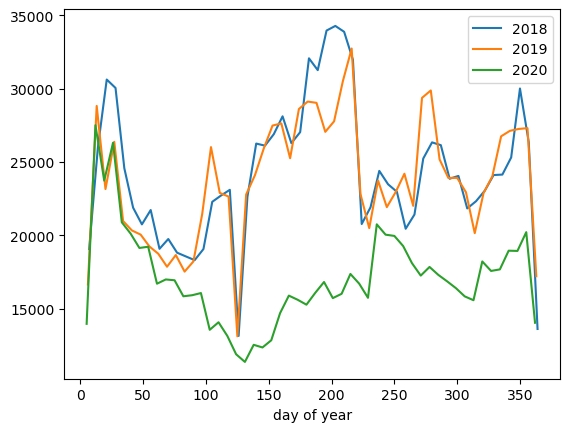

In [10]:
for y in range(2018, 2021):
    df_y = df_resample_w[df_resample_w.index.year==y]
    plt.plot(df_y.index.dayofyear, df_y["Total"], label=y)

plt.xlabel("day of year")
plt.legend()
plt.show()

月が０、日が６

In [11]:
df["day_of_week"] = df.index.dayofweek
display(df.head())
df_wday_ave=df.groupby("day_of_week").mean()
display(df_wday_ave)

bldg_1  bldg_2&3  bldg_4  bldg_5  bldg_6  bldg_7  bldg_8&9  \
Date                                                                     
2014-04-01    5940      8480    1800    1800    6000      62      3660   
2014-04-02    5460      8550    1600    2100    5700      65      3700   
2014-04-03    5390      8220    2000    2000    6800      70      3720   
2014-04-04    4220      8280    1800    2000    7200      70      3720   
2014-04-05    5650      7840    1500    1900    5000      65      3220   

            bldg_10  Hosui-kaikan  Total  day_of_week  
Date                                                   
2014-04-01        0           384  28116            1  
2014-04-02        0           337  27512            2  
2014-04-03        0           418  28667            3  
2014-04-04        0           399  27719            4  
2014-04-05        0           239  25384            5

bldg_1     bldg_2&3       bldg_4       bldg_5       bldg_6  \
day_of_week                                                                    
0            3968.759894  7480.263852  1758.575198  1635.356201  5728.453826   
1            4128.736842  7667.815789  1782.894737  1669.473684  5994.178947   
2            4042.500000  7584.763158  1788.421053  1650.789474  5961.465789   
3            4022.401055  7559.182058  1785.488127  1675.725594  5907.588391   
4            4097.704485  7512.295515  1811.873351  1681.530343  5808.910290   
5            3383.799472  6646.649077  1563.852243  1507.387863  4679.662269   
6            2213.060686  4738.153034  1216.358839  1237.994723  2868.079156   

                 bldg_7     bldg_8&9     bldg_10  Hosui-kaikan         Total  
day_of_week                                                                   
0            112.242744  3509.269129  288.733509    427.686016  25477.089710  
1            114.505263  3588.107895  286.331579    436.210526  26244.992105  
2            109.897368  3521.831579  293.905263    438.942105  26016.102632  
3            120.976253  3544.292876  285.076517    438.598945  25926.891821  
4            115.664908  3504.852243  281.794195    428.960422  25814.823219  
5            108.408971  2871.588391  233.124011    261.361478  21769.583113  
6             93.350923  1755.532982  114.440633    177.158311  14746.506596

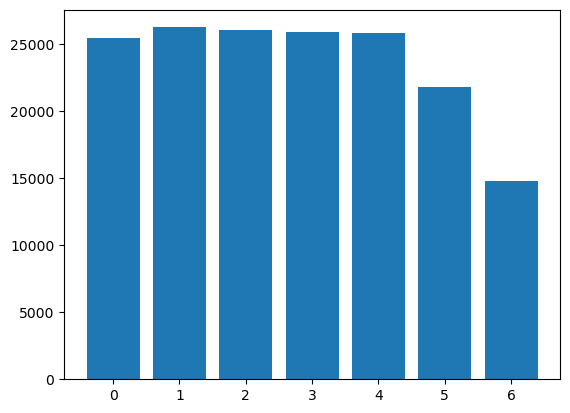

In [12]:
plt.bar(df_wday_ave.index, df_wday_ave["Total"])
plt.show()